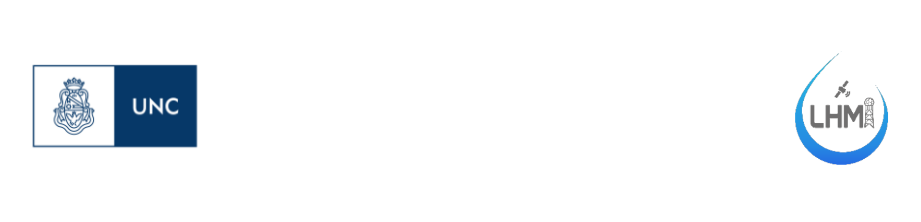

# Análisis y procesamiento de datos del modelo de pronóstico del tiempo Weather Research and Forecasting (WRF)

El modelo WRF es un modelo de mesoescala diseñado para ser utilizado tanto para investigación como para realización de pronósticos operacionales regionales. Este permite a los investigadores y/o operadores producir simulaciones considerando datos reales o en condiciones de atmósfera idealizada, mientras que a la vez provee un pronóstico operacional flexible en una plataforma robusta basada en la contribución de los últimos avances en física, modelado numérico y técnicas de asimilación de datos desarrollados por los investigadores de la comunidad global.

Desde sus inicios en el año 2000 el modelo WRF se fue convirtiendo en uno de los modelos más utilizados a nivel mundial. En 2021, el número de usuarios registrados era de 57.800 distribuidos en 160 países diferentes https://www.mmm.ucar.edu/models/wrf.

## Contenidos
Los contenidos de esta parte curso son los siguientes:


1.   Formato de los archivos de salida de WRF
2.   Instalación e importación de librerías necesarias
3.   Apertura de archivos
4.   Extracción de variables meteorológicas
5.   Gráfico de una variable en un mapa
6.   Extracción de una variable en un lugar geográfico específico
7.   Acá al último capaz que estaría bueno poner algo d




## 1. Formato de los archivos de salida de WRF

WRF ofrece al usuario distintos formatos de salida. Los más conocidos son netCDF y GRIB2. Sin embargo, el formato por defecto es el netCDF.

### ¿Qué es el formato netCDF?
NetCDF (network Common Data Form) es un formato para almacenar datos (variables) científicos multidimensionales tales como la temperatura, humedad, presión, velocidad del viento, etc. La extensión de este tipo de archivos es en general .nc

El formato netCDF es utilizado para almacenar datos de distinta naturaleza. Además de WRF, muchos datos provenientes de satelites meteorológicos, modelos globales, regionales y de radares meteorológicos se almacenan con este tipo de formato.

En la siguiente figura se muestra un esquema de la estructura de este tipo de archivo.

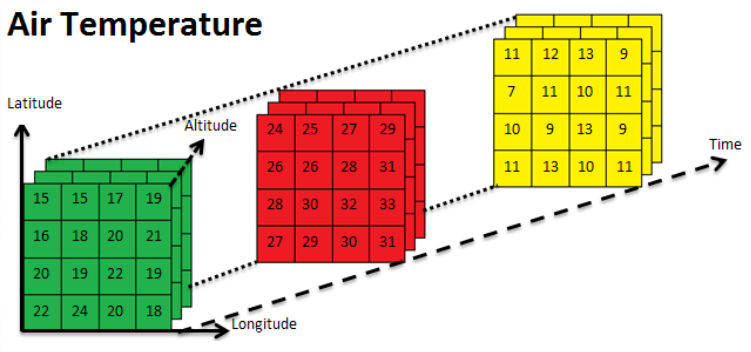

Podemos observar que las distintas variables o campos se guardan en matrices. Las dimensiones de estas representan la latitud y longitud. La altura se representa con más matrices según el numéro de niveles verticales que haya.
Finalmente, los conjuntos de matrices de distintos colores representan el tiempo.
En general, los archivos netCDF contienen multiples campos o variables, cada uno de ellos para distintos tiempos y para cada tiempo tendremos distintas alturas.

## 2. Instalación e importación de librerías necesarias
Para trabajar con datos provenientes del modelo WRF son necesarias al menos las siguientes dos librerías o paquetes:


*   netCDF4
*   wrf-python

Para instalar estas librerías en Google Colab deberemos ejecutar el comando:

***!pip install librería***

Donde *librería* debe ser cambiado por el nombre de la librería que queremos instalar.



In [1]:
# Instalamos la librería wrf-python
# !pip install wrf-python
# !pip install netCDF4

Posteriormente deberemos importar las librerías instaladas. Esto lo haremos en general (hay librerías que se importan con **from *nombre* import *herramienta***) con ***import librería***

## Lectura y estructura de un wrfout

In [ ]:
# Importamos la librería de wrf
import wrf
from netCDF4 import Dataset

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')   #En esta linea solicito acceso al drive

In [ ]:
path_wrfout = "/content/drive/Shareddrives/OHMC - Técnicos/Cursos/PYTHON HIDROMET/wrfout/"

wrfout = Dataset(path_wrfout+'wrfout_d01_2023-12-24_18:00:00.nc')

In [ ]:
wrfout.variables.keys()

dict_keys(['Times', 'XLAT', 'XLONG', 'LU_INDEX', 'ZNU', 'ZNW', 'ZS', 'DZS', 'VAR_SSO', 'U', 'V', 'W', 'PH', 'PHB', 'T', 'THM', 'HFX_FORCE', 'LH_FORCE', 'TSK_FORCE', 'HFX_FORCE_TEND', 'LH_FORCE_TEND', 'TSK_FORCE_TEND', 'MU', 'MUB', 'NEST_POS', 'P', 'PB', 'FNM', 'FNP', 'RDNW', 'RDN', 'DNW', 'DN', 'CFN', 'CFN1', 'THIS_IS_AN_IDEAL_RUN', 'P_HYD', 'Q2', 'T2', 'TH2', 'PSFC', 'U10', 'V10', 'RDX', 'RDY', 'AREA2D', 'DX2D', 'RESM', 'ZETATOP', 'CF1', 'CF2', 'CF3', 'ITIMESTEP', 'XTIME', 'QVAPOR', 'QCLOUD', 'QRAIN', 'QICE', 'QSNOW', 'QGRAUP', 'SHDMAX', 'SHDMIN', 'SNOALB', 'TSLB', 'SMOIS', 'SH2O', 'SMCREL', 'SEAICE', 'XICEM', 'SFROFF', 'UDROFF', 'IVGTYP', 'ISLTYP', 'VEGFRA', 'GRDFLX', 'ACGRDFLX', 'ACSNOM', 'SNOW', 'SNOWH', 'CANWAT', 'SSTSK', 'COSZEN', 'LAI', 'U10E', 'V10E', 'VAR', 'TKE_PBL', 'EL_PBL', 'MAPFAC_M', 'MAPFAC_U', 'MAPFAC_V', 'MAPFAC_MX', 'MAPFAC_MY', 'MAPFAC_UX', 'MAPFAC_UY', 'MAPFAC_VX', 'MF_VX_INV', 'MAPFAC_VY', 'F', 'E', 'SINALPHA', 'COSALPHA', 'HGT', 'TSK', 'P_TOP', 'T00', 'P00', 'TLP

Estas no son todas las variables de un wrfout, existen otras de diagnóstico: https://wrf-python.readthedocs.io/en/latest/diagnostics.html

In [ ]:
var = wrf.getvar(wrfout,'RAINNC',timeidx=wrf.ALL_TIMES)

In [ ]:
var

<xarray.DataArray 'RAINNC' (Time: 13, south_north: 139, west_east: 139)>
array([[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
...
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         2.6007805e-07, 3.5812082e-08, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         5.7866393e-05, 2.5960362e-06, 0.0000000e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -68.33 -68.26 ... -59.58 -59.52
    XLAT     (south_north, west_east) float32 -35.85 -35.85 ... -28.42 -28.42
    XTIME    (Time) float32 0.0 60.0 120.0 180.0 ... 540.0 600.0 660.0 720.0
  * Time     (Time) datetime64[ns] 2023-12-24T18:00:00 ... 2023-12-25T06:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  ACCUMULATED TOTAL GRID SCALE PRECIPITATION
    units:        mm
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=-63.744998931884766, moad_cen_la...

## Graficamos variables en un mapa

In [ ]:
# not using `python-cartopy` package as it doesn't include all build dependencies
# !apt-get install libproj-dev proj-bin proj-data
# !apt-get install libgeos-dev

# shapely needs to be reinstalled to use the same geos install as cartopy (https://github.com/SciTools/cartopy/issues/871)
# !pip uninstall -y shapely
# !pip install --no-binary shapely shapely
# !pip install cartopy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libproj-dev is already the newest version (9.1.1-1~jammy0).
proj-bin is already the newest version (9.1.1-1~jammy0).
proj-data is already the newest version (9.1.1-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgeos-dev is already the newest version (3.11.1-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Found existing installation: shapely 2.0.3
Uninstalling shapely-2.0.3:
  Successfully uninstalled shapely-2.0.3
  Using cached shapely-2.0.3-cp310-cp310-linux_x86_64.whl


ERROR: Operation cancelled by user


In [ ]:
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as crs
import cartopy.io.shapereader as shp
from cartopy.feature import ShapelyFeature

from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim, interplevel,
                 cartopy_ylim, latlon_coords)
import matplotlib.pyplot as plt

In [ ]:
import matplotlib

nws_precip_colors = [
    "#04e9e7",  # 0.01 - 0.10 inches
    "#019ff4",  # 0.10 - 0.25 inches
    "#0300f4",  # 0.25 - 0.50 inches
    "#02fd02",  # 0.50 - 0.75 inches
    "#01c501",  # 0.75 - 1.00 inches
    "#008e00",  # 1.00 - 1.50 inches
    "#fdf802",  # 1.50 - 2.00 inches
    "#e5bc00",  # 2.00 - 2.50 inches
    "#fd9500",  # 2.50 - 3.00 inches
    "#fd0000",  # 3.00 - 4.00 inches
    "#d40000",  # 4.00 - 5.00 inches
    "#bc0000",  # 5.00 - 6.00 inches
    "#f800fd",  # 6.00 - 8.00 inches
    "#9854c6",  # 8.00 - 10.00 inches
    "#6d04b5"
]
precip_colormap = matplotlib.colors.ListedColormap(nws_precip_colors)

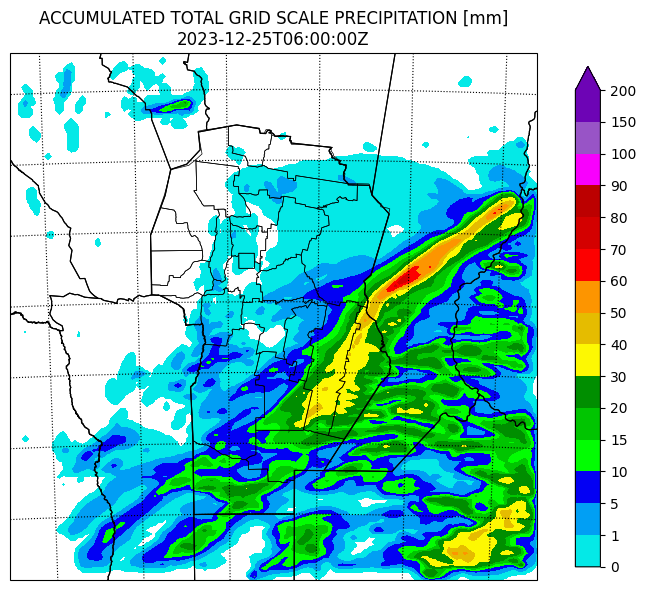

In [ ]:
var = wrf.getvar(wrfout,'RAINNC',timeidx=wrf.ALL_TIMES)

campo = var[-1,:,:]

# Obtener puntos lat/lon
lats, lons = latlon_coords(var)

# Obtener el objeto mapeable
cart_proj = get_cartopy(var)

fig = plt.figure(figsize=[8,6], tight_layout=True)

# Utilizar la proyección de WRF
ax = plt.axes(projection=cart_proj)

ax.coastlines('10m', linewidth=1)

dptos = shp.Reader('/content/drive/Shareddrives/OHMC - Técnicos/Cursos/PYTHON HIDROMET/shapes/departamentos.shp' )
pcias = shp.Reader('/content/drive/Shareddrives/OHMC - Técnicos/Cursos/PYTHON HIDROMET/shapes/provincias.shp' )

shape_dp = ShapelyFeature(dptos.geometries(),
                                crs.PlateCarree(), edgecolor='black')
shape_pcias = ShapelyFeature(pcias.geometries(),
                                crs.PlateCarree(), edgecolor='black')

ax.add_feature(shape_dp, linewidth=.5, facecolor='none')
ax.add_feature(shape_pcias, linewidth=.8, facecolor='none')

levels = [0.01, 1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80,
          90, 100, 150, 200]
norm = matplotlib.colors.BoundaryNorm(levels, 15)

# Agregar contornos/límites
plt.contourf(to_np(lons), to_np(lats), to_np(campo), transform=crs.PlateCarree(),
             levels=levels, norm=norm, cmap=precip_colormap, extend='max')

plt.colorbar(ax=ax, shrink=.95, ticks=levels)

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")
plt.title(var.attrs['description']+ " ["+var.attrs['units']+"]\n"+str(campo.Time.values)[:19]+"Z")

plt.tight_layout()
plt.show()

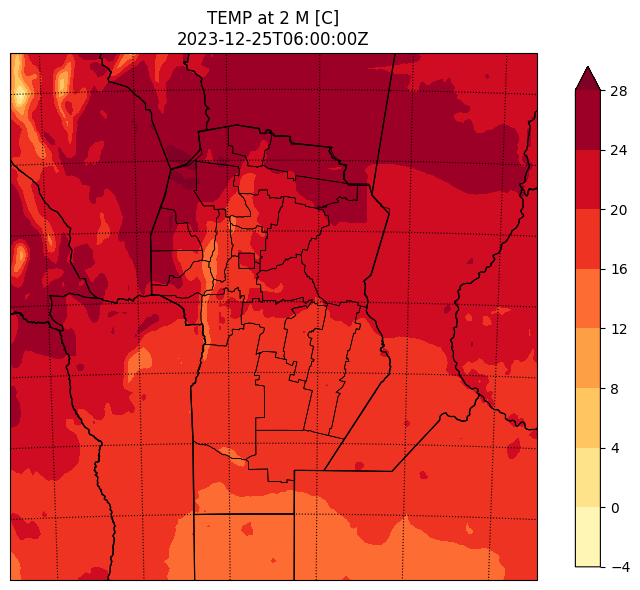

In [ ]:
var = wrf.getvar(wrfout, 'T2', timeidx=wrf.ALL_TIMES)

campo = var[-1,:,:]

fig = plt.figure(figsize=[8,6], tight_layout=True)

# Utilizar la proyección de WRF
ax = plt.axes(projection=cart_proj)

ax.coastlines('10m', linewidth=1)

ax.add_feature(shape_dp, linewidth=.5, facecolor='none')
ax.add_feature(shape_pcias, linewidth=.8, facecolor='none')


# Agregar contornos/límites
plt.contourf(to_np(lons), to_np(lats), to_np(campo)-273.15, transform=crs.PlateCarree(),
             cmap='YlOrRd', extend='max')

plt.colorbar(ax=ax, shrink=.95)

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")
plt.title(var.attrs['description']+ " [C]\n"+str(campo.Time.values)[:19]+"Z")

plt.tight_layout()
plt.show()

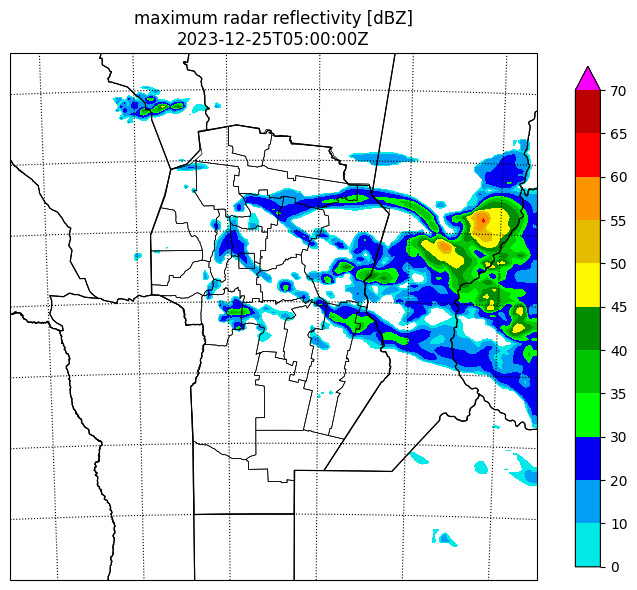

In [ ]:
var = wrf.getvar(wrfout, 'mdbz', timeidx=wrf.ALL_TIMES)

campo = var[-2,:,:]

fig = plt.figure(figsize=[8,6], tight_layout=True)

# Utilizar la proyección de WRF
ax = plt.axes(projection=cart_proj)

ax.coastlines('10m', linewidth=1)

ax.add_feature(shape_dp, linewidth=.5, facecolor='none')
ax.add_feature(shape_pcias, linewidth=.8, facecolor='none')


levels = [0, 10, 20, 30, 35, 40, 45, 50, 55, 60, 65, 70]
norm = matplotlib.colors.BoundaryNorm(levels, 12)

# Agregar contornos/límites
plt.contourf(to_np(lons), to_np(lats), to_np(campo), transform=crs.PlateCarree(),
             levels=levels, norm=norm, cmap=precip_colormap, extend='max')

plt.colorbar(ax=ax, shrink=.95, ticks=levels)

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")
plt.title(var.attrs['description']+ " ["+var.attrs['units']+"]\n"+str(campo.Time.values)[:19]+"Z")

plt.tight_layout()
plt.show()

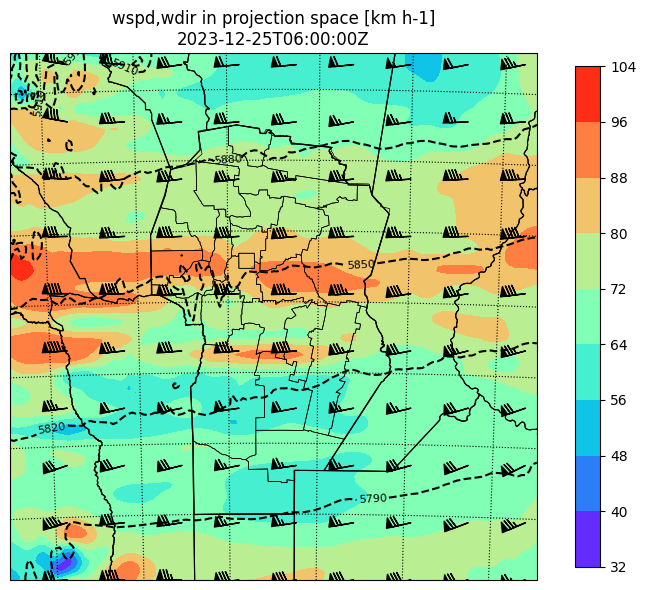

In [ ]:
# Extract the pressure, geopotential height, and wind variables
p    = wrf.getvar(wrfout, "pressure")
z    = wrf.getvar(wrfout, "z", units="m")
ua   = wrf.getvar(wrfout, "ua", units="km h-1")
va   = wrf.getvar(wrfout, "va", units="km h-1")
wspd = wrf.getvar(wrfout, "wspd_wdir", units="km h-1")[0,:]

# Interpolate geopotential height, u, and v winds to 'press' hPa
press    = 500
ht_500   = wrf.interplevel(z, p, press)
u_500    = wrf.interplevel(ua, p, press)
v_500    = wrf.interplevel(va, p, press)
wspd_500 = wrf.interplevel(wspd, p, press)

# Obtener puntos lat/lon
lats, lons = latlon_coords(ht_500)

# Obtener el objeto mapeable
cart_proj = get_cartopy(ht_500)

fig = plt.figure(figsize=[8,6], tight_layout=True)

# Utilizar la proyección de WRF
ax = plt.axes(projection=cart_proj)

ax.coastlines('10m', linewidth=1)

ax.add_feature(shape_dp, linewidth=.5, facecolor='none')
ax.add_feature(shape_pcias, linewidth=.8, facecolor='none')


# Add the 500 hPa geopotential height contours
contours = plt.contour(to_np(lons), to_np(lats), to_np(ht_500), colors="black", linestyles='dashed',
                       transform=crs.PlateCarree())

plt.clabel(contours, inline=1, fontsize=8, fmt="%i")

# Add the wind speed contours
wspd_contours = plt.contourf(to_np(lons), to_np(lats), to_np(wspd_500),
                             cmap="rainbow",
                             transform=crs.PlateCarree())

plt.colorbar(wspd_contours, ax=ax, orientation="vertical", shrink=.95)

# Add the 500 hPa wind barbs, only plotting every 125th data point.
nro = 15
plt.barbs(to_np(lons[::nro,::nro]), to_np(lats[::nro,::nro]),
          to_np(u_500[::nro, ::nro]), to_np(v_500[::nro, ::nro]),
          transform=crs.PlateCarree(), length=6)

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")
plt.title(wspd.attrs['description']+ " ["+wspd.attrs['units']+"]\n"+str(campo.Time.values)[:19]+"Z")

plt.tight_layout()
plt.show()

## Cómo extraemos una variable en un punto en particular?

Extraemos la temperatura pronosticada a 2m para la Ciudad de Córdoba y la graficamos en función del tiempo

In [ ]:
import pandas as pd

# Coordenadas de interes
lat = -31.43289
lon = -64.17986

(x, y) = wrf.ll_to_xy(wrfout, lat, lon)
print('Coordenadas x,y =',int(x),',',int(y))

T2 = wrf.getvar(wrfout, 'T2', timeidx=wrf.ALL_TIMES)

T2_loc = T2[:, y, x]

df_T2_loc = pd.DataFrame(T2_loc.to_pandas(), columns=['T2'])

df_T2_loc['T2'] = df_T2_loc['T2'] - 273.15

df_T2_loc.head()

Coordenadas x,y = 62 , 83


,T2
Time,
2023-12-24 18:00:00,30.231506
2023-12-24 19:00:00,31.458466
2023-12-24 20:00:00,32.352356
2023-12-24 21:00:00,32.750702
2023-12-24 22:00:00,32.524170


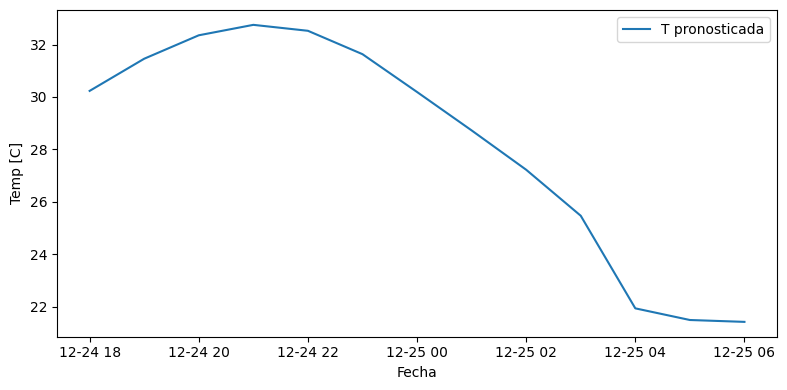

In [ ]:
fig = plt.figure(figsize=(8,4))

plt.plot(df_T2_loc.index, df_T2_loc['T2'], label='T pronosticada')

plt.xlabel('Fecha')
plt.ylabel('Temp [C]')

plt.legend()
plt.tight_layout()
plt.show()

## Y si queremos graficar en función de la altura para un mismo instante?

Graficamos la temperatura sobre la Ciudad de Córdoba

In [ ]:
# Coordenadas de interes
lat = -31.43289
lon = -64.17986

timeid = 5

(x, y) = wrf.ll_to_xy(wrfout, lat, lon)
print('Coordenadas x,y =',int(x),',',int(y))

T = wrf.getvar(wrfout, 'tc', timeidx=wrf.ALL_TIMES)
hagl = wrf.getvar(wrfout, 'height_agl', timeidx=wrf.ALL_TIMES)

print(T.shape)

T_loc    = T[timeid, :, y, x]
hagl_loc = hagl[timeid, :, y, x]

df_T_loc = pd.DataFrame({'T':T_loc, 'Altura':hagl_loc})

df_T_loc.head()

Coordenadas x,y = 62 , 83
(13, 34, 139, 139)


,T,Altura
0,31.337036,26.617523
1,30.698792,87.182129
2,29.927124,164.199341
3,28.970398,261.554077
4,27.776825,383.700562


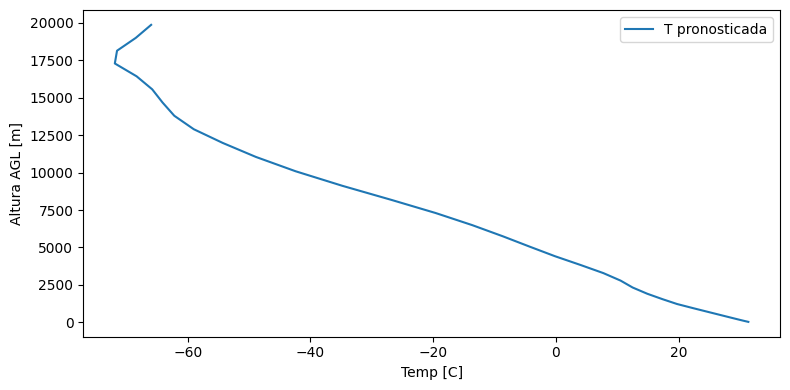

In [ ]:
fig = plt.figure(figsize=(8,4))

plt.plot(df_T_loc['T'], df_T_loc['Altura'], label='T pronosticada')

plt.xlabel('Temp [C]')
plt.ylabel('Altura AGL [m]')

plt.legend()
plt.tight_layout()
plt.show()

## Agregamos la temperatura de rocío

In [ ]:
Td = wrf.getvar(wrfout, 'td', timeidx=wrf.ALL_TIMES)
Td_loc = Td[timeid, :, y, x]

df_T_loc['Td'] = Td_loc

df_T_loc.head()

,T,Altura,Td
0,31.337036,26.617523,17.122162
1,30.698792,87.182129,17.023884
2,29.927124,164.199341,16.889288
3,28.970398,261.554077,16.716066
4,27.776825,383.700562,16.496761


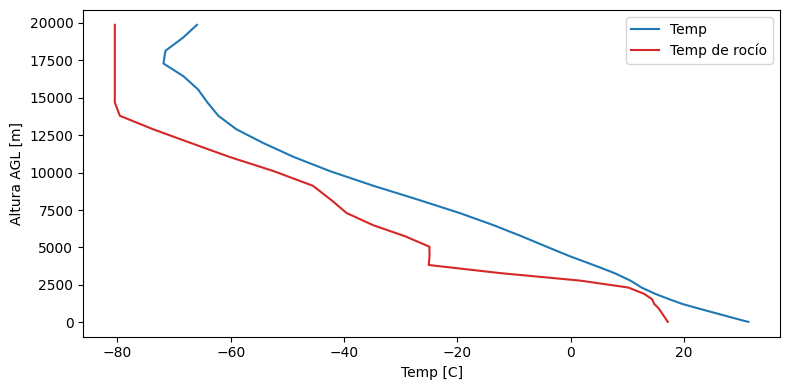

In [ ]:
fig = plt.figure(figsize=(8,4))

plt.plot(df_T_loc['T'], df_T_loc['Altura'], label='Temp', color='tab:blue')
plt.plot(df_T_loc['Td'], df_T_loc['Altura'], label='Temp de rocío', color='tab:red')

plt.xlabel('Temp [C]')
plt.ylabel('Altura AGL [m]')

plt.legend()
plt.tight_layout()
plt.show()

## Graficamos la variación vertical del viento

In [ ]:
# Coordenadas de interes
lat = -31.43289
lon = -64.17986

timeid = 0

(x, y) = wrf.ll_to_xy(wrfout, lat, lon)
print('Coordenadas x,y =',int(x),',',int(y))

wspd = wrf.getvar(wrfout, "wspd_wdir", units="km h-1", timeidx=wrf.ALL_TIMES)[0,:]
wspd_loc = wspd[timeid, :, y, x]

df_wspd_loc = pd.DataFrame({'wspd':wspd_loc, 'Altura':hagl_loc})

df_wspd_loc.head()

Coordenadas x,y = 62 , 83


,wspd,Altura
0,13.803066,26.617523
1,14.555391,87.182129
2,15.864481,164.199341
3,17.525866,261.554077
4,18.775696,383.700562


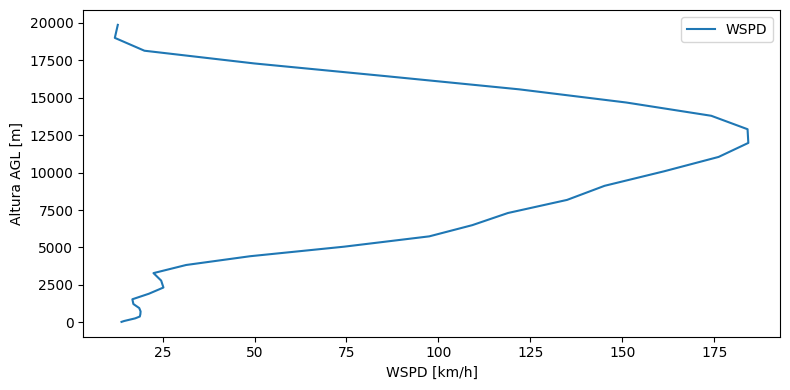

In [ ]:
fig = plt.figure(figsize=(8,4))

plt.plot(df_wspd_loc['wspd'], df_wspd_loc['Altura'], label='WSPD', color='tab:blue')

plt.xlabel('WSPD [km/h]')
plt.ylabel('Altura AGL [m]')

plt.legend()
plt.tight_layout()
plt.show()

## Cómo exportamos un archivo GeoTiff a partir de una o varias variables de un wrfout?

In [3]:
# Instalamos librearias necesarias
# !pip install rasterio
# !pip install affine

In [ ]:
import rasterio
from affine import Affine
from osgeo import gdal_array, gdal, osr
import numpy as np

In [ ]:
# Lista de variables a convertir en GeoTiff
WRF_VARIABLES = ['RAINNC']

# Abro una variable cualquiera para extraer los bordes geográficos
ncfile = Dataset(path_wrfout+'wrfout_d01_2023-12-24_18:00:00.nc')
var = wrf.getvar(wrfout, 'HGT', timeidx=0)
ncfile.close()

# Extent de destino [min_lon, min_lat, max_lon, max_lat]
# Consiste en los bordes del dominio en lat, lon decimal
DST_EXTENT = [float(np.min(var.XLONG)),
              float(np.min(var.XLAT)),
              float(np.max(var.XLONG)),
              float(np.max(var.XLAT))]

# Extent de la fuente
# Consiste en los bordes del dominio en puntos de grilla
SRC_EXTENT = [cartopy_xlim(var)[0],
              cartopy_ylim(var)[0],
              cartopy_xlim(var)[1],
              cartopy_ylim(var)[1]]

# Valor de un grado en kilometros
KM_PER_DEGREE = 111.32
# Configurar resolución acorde a la simulación
RESOLUTION = 6

In [ ]:
# Se deben configurar los parámetros de source_prj cuando cambie el dominio, bordes y/o resolución
# de lo contrario surgirán errores en la proyección de salida.
# Puede conseguir estos parámetros (CEN_LAT, CEN_LON, TRUELAT1 y TRUELAT2)
# haciendo un print del objeto wrfout.

def getGeoT(extent, nlines, ncols):
    # Compute resolution based on data dimension
    resx = (extent[2] - extent[0]) / ncols
    resy = (extent[3] - extent[1]) / nlines
    return [extent[0], resx, 0, extent[3], 0, -resy]


# TodDo: ray to this
def cambiar_projection(in_array: np.ndarray):
    """Convert Grid to New Projection.
        Parameters
        ----------
        in_array
    """
    # WRF Spatial Reference System
    source_prj = osr.SpatialReference()
    #####################################################################
    ### Modificar las variables CEN_LAT, CEN_LON, TRUELAT1 y TRUELAT2 ###
    #####################################################################
    # source_prj.ImportFromProj4('+proj=lcc +lat_0=CEN_LAT +lon_0=-CEN_LON '
    #                            '+lat_1=TRUELAT1 +lat_2=TRUELAT2 +x_0=0 +y_0=0 +R=6370000'
    #                            ' +units=m +no_defs')
    source_prj.ImportFromProj4('+proj=lcc +lat_0=-32.209984 +lon_0=-63.744995 '
                               '+lat_1=-32.21 +lat_2=-32.21 +x_0=0 +y_0=0 +R=6370000'
                               ' +units=m +no_defs')
    # Lat/lon WSG84 Spatial Reference System
    target_prj = osr.SpatialReference()
    target_prj.ImportFromProj4('+proj=longlat +ellps=WGS84 '
                               '+datum=WGS84 +no_defs')

    # se configura la matriz destino
    sizex = int(((DST_EXTENT[2] - DST_EXTENT[0]) * KM_PER_DEGREE) / RESOLUTION)
    sizey = int(((DST_EXTENT[3] - DST_EXTENT[1]) * KM_PER_DEGREE) / RESOLUTION)
    #print('sizex, sizey =',sizex,',', sizey)

    out_array = np.ndarray(shape=(int(in_array.coords['Time'].count()),
                           sizey, sizex))
    #print('out_array.shape:',out_array.shape)

    for t in range(in_array.coords['Time'].size):
        # loar gdal array y se le asigna la projección y transofrmación
        raw = gdal_array.OpenArray(np.flipud(in_array[t].values))
        raw.SetProjection(source_prj.ExportToWkt())
        raw.SetGeoTransform(getGeoT(SRC_EXTENT,
                                    raw.RasterYSize,
                                    raw.RasterXSize))

        grid = gdal.GetDriverByName('MEM').Create("tmp_ras",
                                                  sizex, sizey, 1,
                                                  gdal.GDT_Float32)
        # Setup projection and geo-transformation
        grid.SetProjection(target_prj.ExportToWkt())
        grid.SetGeoTransform(getGeoT(DST_EXTENT,
                                     grid.RasterYSize,
                                     grid.RasterXSize))

        # reprojectamos
        gdal.ReprojectImage(raw,
                            grid,
                            source_prj.ExportToWkt(),
                            target_prj.ExportToWkt(),
                            gdal.GRA_NearestNeighbour,
                            options=['NUM_THREADS=ALL_CPUS'])

        out_array[t] = grid.ReadAsArray()

    #print('raw.RasterXSize, raw.RasterYSize:',raw.RasterXSize,',',raw.RasterYSize)
    #print('grid.RasterXSize, grid.RasterYSize:',grid.RasterXSize,',',grid.RasterYSize)

    return out_array, grid.GetGeoTransform(), grid.GetProjection()


def guardar_tif(geoTransform: list, target_prj: str,
                arr: np.ndarray, out_path: str):
    nw_ds = rasterio.open(out_path, 'w', driver='GTiff',
                          height=arr.shape[0],
                          width=arr.shape[1],
                          count=1, dtype=str(arr.dtype),
                          crs=target_prj,
                          transform=Affine.from_gdal(*geoTransform))
    nw_ds.write(arr, 1)
    nw_ds.close()

def generar_imagenes(ncwrf: Dataset, path_gtiff: str):
    """
    """
    # for future implementation of different path
    # try:
    #    os.makedirs(os.path.dirname(path_gtiff))
    # except OSError:
    #    pass

    for variable in WRF_VARIABLES:
        var = wrf.getvar(ncwrf, variable, timeidx=wrf.ALL_TIMES)
        if variable == 'T2':
            var.values = var.values - 273.15

        var_proj, geoTransform, target_prj = cambiar_projection(var)
        base_path = f"{path_gtiff}{variable}"
        #print('var_proj.shape:',var_proj.shape)
        #print('geoTransform:',geoTransform)
        #print('target_prj:',target_prj)

        for t in range(ncwrf.dimensions['Time'].size):
            date = str(var.coords['Time'].values[t])[:16]
            guardar_tif(geoTransform,
                        target_prj,
                        var_proj[t],
                        f"{base_path}_{date}")

In [ ]:
# Genero los archivos geotiff
# wrfout de entrada
ncfile = Dataset(path_wrfout+'wrfout_d01_2023-12-24_18:00:00.nc')
# Directorio donde guardar los geotiff
path_gtiff = ('./')
generar_imagenes(ncfile, path_gtiff)
ncfile.close()
# Otra opción es usar gdal via terminal de linux pero no lo he chequeado

In [ ]:
# Limpio el directorio temp
!rm *

rm: cannot remove 'drive': Is a directory
rm: cannot remove 'sample_data': Is a directory


## Cómo graficamos un radiosondeo sintético a partir de una simulación?

Referencia: https://pratiman-91.github.io/2021/08/05/SkewT-Plots-from-WRF-outputs.html

In [4]:
# !pip install metpy

In [ ]:
from metpy.plots import SkewT
from metpy.units import units

In [ ]:
ncfile = Dataset(path_wrfout+'wrfout_d01_2023-12-24_18:00:00.nc')
# Lat Lon donde calcularemos nuestro sondeo sintético. En este ejemplo, aerocba
lat_lon = [-31.31193, -64.212419]
x_y = wrf.ll_to_xy(ncfile, lat_lon[0], lat_lon[1])

In [ ]:
# presión
p1  = wrf.getvar(ncfile, "pressure", timeidx=0)
# Temp en grados C
T1  = wrf.getvar(ncfile, "tc", timeidx=0)
# Temp. rocio
Td1 = wrf.getvar(ncfile, "td", timeidx=0)
# Comp u del viento
u1  = wrf.getvar(ncfile, "ua", timeidx=0)
# Comp v del viento
v1  = wrf.getvar(ncfile, "va", timeidx=0)
ncfile.close()

In [ ]:
# Calculamos las variables en el punto de interes y con las unidades adecuadas
p  = p1 [:,x_y[0],x_y[1]] * units.hPa
T  = T1 [:,x_y[0],x_y[1]] * units.degC
Td = Td1[:,x_y[0],x_y[1]] * units.degC
u  = u1 [:,x_y[0],x_y[1]] * units('m/s')
v  = v1 [:,x_y[0],x_y[1]] * units('m/s')

### Realizamos el gráfico

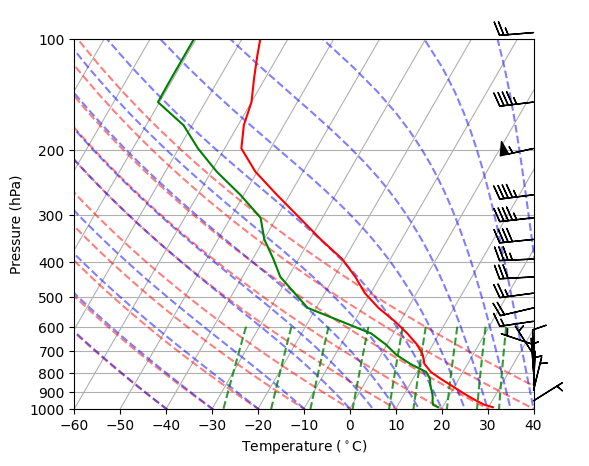

In [ ]:
import metpy.calc as mpcalc

# Example of defining your own vertical barb spacing
skew = SkewT()

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')

# Set spacing interval--Every 50 mb from 1000 to 100 mb
my_interval = np.arange(100, 1000, 50) * units('mbar')

# Get indexes of values closest to defined interval
ix = mpcalc.resample_nn_1d(p, my_interval)

# Plot only values nearest to defined interval values
skew.plot_barbs(p[ix], u[ix], v[ix])

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-60, 40)
skew.ax.set_xlabel('Temperature ($^\circ$C)')
skew.ax.set_ylabel('Pressure (hPa)')

plt.show()

## Corte transversal

Referencia: https://wrf-python.readthedocs.io/en/latest/plot.html

<ipython-input-272-bb61f4120b1e>:53: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  first_idx = int(np.transpose((column_vals > -200).nonzero())[0])


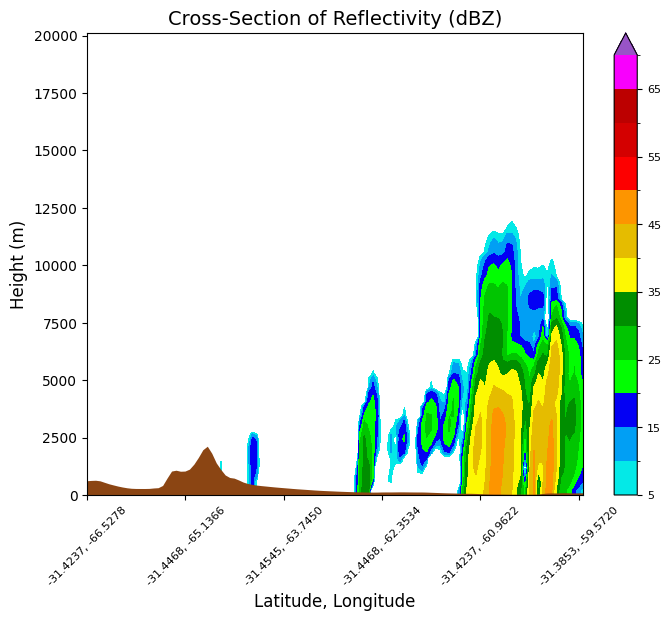

In [ ]:
from matplotlib.cm import get_cmap
from matplotlib.colors import from_levels_and_colors
from cartopy import crs
from cartopy.feature import NaturalEarthFeature, COLORS
from wrf import (getvar, to_np, get_cartopy, latlon_coords, vertcross,
                 cartopy_xlim, cartopy_ylim, interpline, CoordPair)

ncfile = Dataset(path_wrfout+'wrfout_d01_2023-12-24_18:00:00.nc')
timeidx = -2

# Define the cross section start and end points
cross_start = CoordPair(lat=-31.409, lon=-66.51)
cross_end = CoordPair(lat=-31.409, lon=-59.5)

# Get the WRF variables
ht = getvar(ncfile, "z", timeidx=timeidx)
ter = getvar(ncfile, "ter", timeidx=timeidx)
dbz = getvar(ncfile, "dbz", timeidx=timeidx)
max_dbz = getvar(ncfile, "mdbz", timeidx=timeidx)
Z = 10**(dbz/10.) # Use linear Z for interpolation

# Compute the vertical cross-section interpolation.  Also, include the
# lat/lon points along the cross-section in the metadata by setting latlon
# to True.
z_cross = vertcross(Z, ht, wrfin=ncfile,
                    start_point=cross_start,
                    end_point=cross_end,
                    latlon=True, meta=True)

# Convert back to dBz after interpolation
dbz_cross = 10.0 * np.log10(z_cross)

# Add back the attributes that xarray dropped from the operations above
dbz_cross.attrs.update(z_cross.attrs)
dbz_cross.attrs["description"] = "radar reflectivity cross section"
dbz_cross.attrs["units"] = "dBZ"

# To remove the slight gap between the dbz contours and terrain due to the
# contouring of gridded data, a new vertical grid spacing, and model grid
# staggering, fill in the lower grid cells with the first non-missing value
# for each column.

# Make a copy of the z cross data. Let's use regular numpy arrays for this.
dbz_cross_filled = np.ma.copy(to_np(dbz_cross))

# For each cross section column, find the first index with non-missing
# values and copy these to the missing elements below.
for i in range(dbz_cross_filled.shape[-1]):
    column_vals = dbz_cross_filled[:,i]
    # Let's find the lowest index that isn't filled. The nonzero function
    # finds all unmasked values greater than 0. Since 0 is a valid value
    # for dBZ, let's change that threshold to be -200 dBZ instead.
    first_idx = int(np.transpose((column_vals > -200).nonzero())[0])
    dbz_cross_filled[0:first_idx, i] = dbz_cross_filled[first_idx, i]

# Get the terrain heights along the cross section line
ter_line = interpline(ter, wrfin=ncfile, start_point=cross_start,
                      end_point=cross_end)

# Get the lat/lon points
lats, lons = latlon_coords(dbz)

# Get the cartopy projection object
cart_proj = get_cartopy(dbz)

# Create the figure
fig = plt.figure(figsize=(8,6))
ax_cross = plt.axes()

dbz_levels = np.arange(5., 75., 5.)

# Create the color table found on NWS pages.
dbz_rgb = np.array([[4,233,231],
                    [1,159,244], [3,0,244],
                    [2,253,2], [1,197,1],
                    [0,142,0], [253,248,2],
                    [229,188,0], [253,149,0],
                    [253,0,0], [212,0,0],
                    [188,0,0],[248,0,253],
                    [152,84,198]], np.float32) / 255.0

dbz_map, dbz_norm = from_levels_and_colors(dbz_levels, dbz_rgb,
                                           extend="max")

# Make the cross section plot for dbz
dbz_levels = np.arange(5.,75.,5.)
xs = np.arange(0, dbz_cross.shape[-1], 1)
ys = to_np(dbz_cross.coords["vertical"])
dbz_contours = ax_cross.contourf(xs,
                                 ys,
                                 to_np(dbz_cross_filled),
                                 levels=dbz_levels,
                                 cmap=dbz_map,
                                 norm=dbz_norm,
                                 extend="max")
# Add the color bar
cb_dbz = fig.colorbar(dbz_contours, ax=ax_cross)
cb_dbz.ax.tick_params(labelsize=8)

# Fill in the mountain area
ht_fill = ax_cross.fill_between(xs, 0, to_np(ter_line),
                                facecolor="saddlebrown")

# Set the x-ticks to use latitude and longitude labels
coord_pairs = to_np(dbz_cross.coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str() for pair in to_np(coord_pairs)]

# Set the desired number of x ticks below
num_ticks = 5
thin = int((len(x_ticks) / num_ticks) + .5)
ax_cross.set_xticks(x_ticks[::thin])
ax_cross.set_xticklabels(x_labels[::thin], rotation=45, fontsize=8)

# Set the x-axis and  y-axis labels
ax_cross.set_xlabel("Latitude, Longitude", fontsize=12)
ax_cross.set_ylabel("Height (m)", fontsize=12)

# Add a title
ax_cross.set_title("Cross-Section of Reflectivity (dBZ)", {"fontsize" : 14})

ncfile.close()
plt.show()